Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\hank\AppData\Local\Temp\jieba.cache
Loading model cost 0.491 seconds.
Prefix dict has been built successfully.


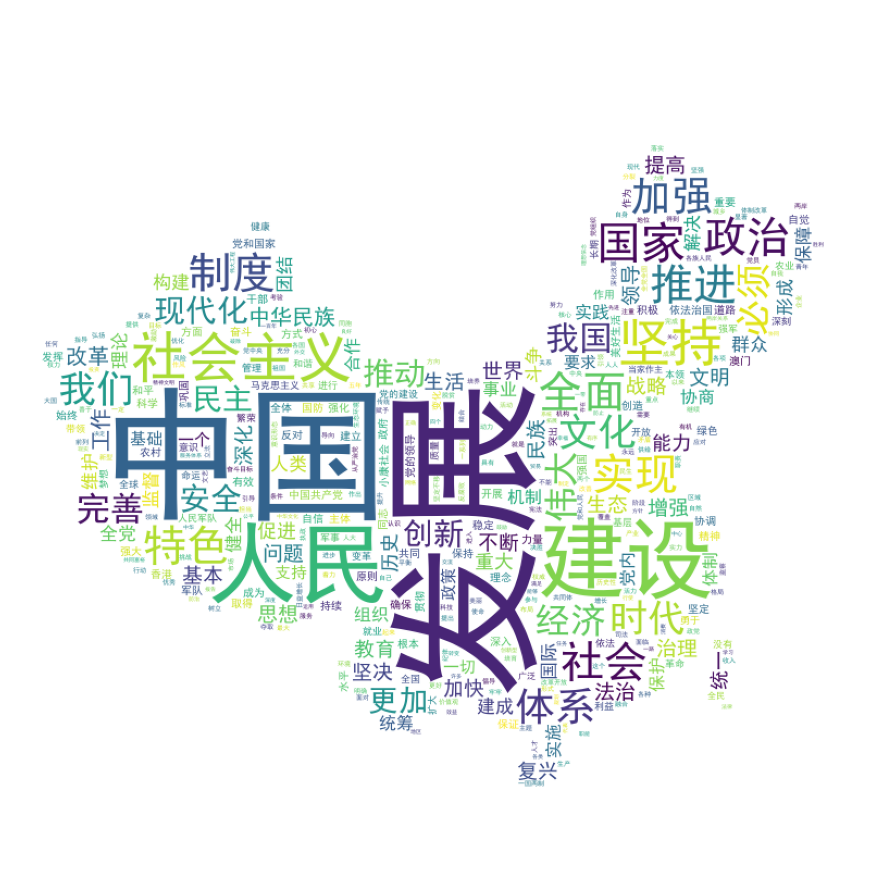

In [1]:
import jieba
from wordcloud import WordCloud
from matplotlib.pyplot import imread
from collections import Counter
import matplotlib.pyplot as plt

data={}

text_file = open('./data/19Congress.txt','r',encoding='utf-8')
text = text_file.read()
with open('./data/stopwords.txt',encoding='utf-8') as file:
    stopwords = {line.strip() for line in file}

seg_list = jieba.cut(text, cut_all=False)
for word in seg_list:
    if len(word)>=2:
        if not data.__contains__(word):
            data[word]=0
        data[word]+=1
#print(data)      
 
my_wordcloud = WordCloud(  
    background_color='white',  #设置背景颜色
    max_words=400,  #设置最大实现的字数
    font_path=r'./data/SimHei.ttf',  #设置字体格式，如不设置显示不了中文
    mask=imread('./data/mapofChina.jpg'), #指定在什么图片上画
    width=1000,
    height=1000,
    stopwords = stopwords
).generate_from_frequencies(data)

plt.figure(figsize=(18,16))
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()  # 展示词云
my_wordcloud.to_file('result.jpg')
text_file.close()